<center><h1>Jayaram_ChaitanyaPriya_HW2</h1></center>
<br>
<br>

Name: Chaitanya Priya Kakkehalli Jayaram
<br>
Github Username: chaitanya-priya-kj
<br>
USC ID: 9525343278

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [287]:
import sklearn
import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import f1_score
import math
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial import distance
#!pip3 install openpyxl
#!pip3 install statsmodels

Get the Cycle Power Plant Data Set

In [309]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')

In [310]:
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [311]:
print("Columns present in the dataset ",data.columns)
print("Number of columns present in the dataset:",len(data.columns))

Columns present in the dataset  Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
Number of columns present in the dataset: 5


In [312]:
print("Number of rows present in the dataframe:",len(data))

Number of rows present in the dataframe: 9568


Each of the column in the dataframe represent a feature that describes the dataset and a target variable.<br> Features
consist of:<br>
- Ambient Temperature (AT)<br> 
- Ambient Pressure (AP)<br>
- Relative Humidity (RH)<br> 
- Exhaust Vacuum (V) <br> 
- net hourly electrical energy output (PE) of the plant. <br><br> The rows represent the values representing each of the feature and the output value. 

#### ii. pairwise scatterplots of all the varianbles

In [313]:
scatter_plot = sns.pairplot(data = data)

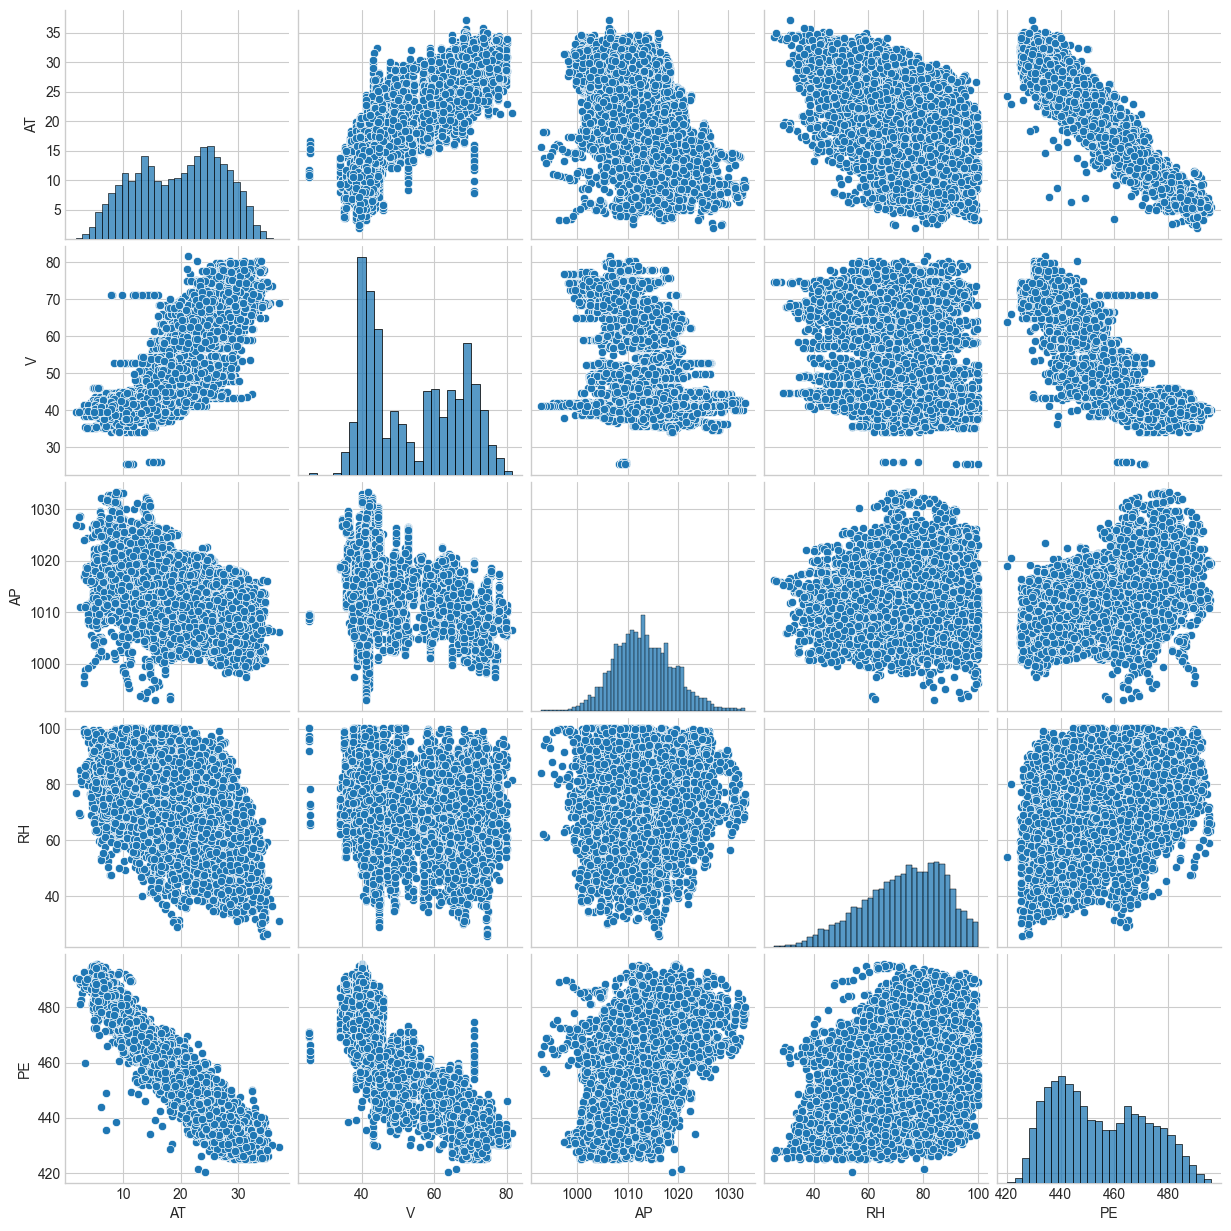

In [314]:
plt.show()

Inferences from pairwise scatter plot:<br><br>
AT v/s PE --> these variables are negatively correlated<br>
AT v/s V --> these variables are positively correlated<br>
<br>
V v/s PE --> these variables are negatively correlated<br>


#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [294]:
desc = data.describe()
_range = data.max() - data.min()
desc.loc['range'] = _range
desc = desc.drop(index=['count','std','min','max'])
desc = desc.rename(index={'25%':'first quartile','50%':'median','75%':'third quartile'})
iqr = data.quantile(0.75) - data.quantile(0.25)
desc.loc['IQR'] = iqr

In [295]:
round(desc,2)

,AT,V,AP,RH,PE
mean,19.65,54.31,1013.26,73.31,454.37
first quartile,13.51,41.74,1009.10,63.33,439.75
median,20.34,52.08,1012.94,74.97,451.55
third quartile,25.72,66.54,1017.26,84.83,468.43
range,35.30,56.20,40.41,74.60,75.50
IQR,12.21,24.80,8.16,21.50,28.68


### (c) Simple Linear Regression

The predictors present in the dataset are: Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). Using these predictors, we fit a simple linear regression model to predict energy output of the plant. 


--------------------------------------------------------------
Description of the model with predictor Ambient Temperature (AT) 
--------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:01   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 

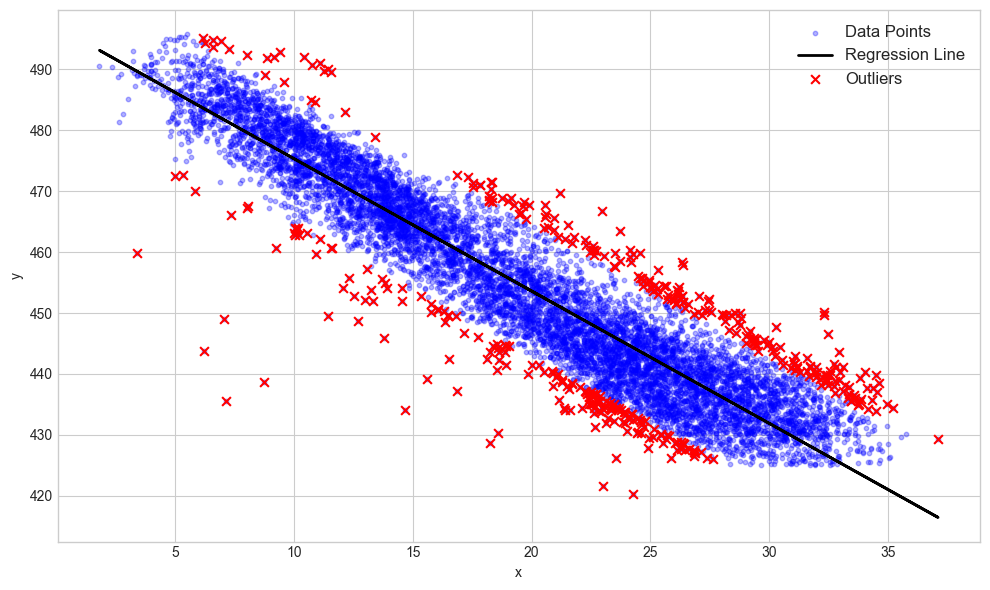


--------------------------------------------------------------
Description of the model with predictor Exhaust Vacuum (V) 
--------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:01   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef  

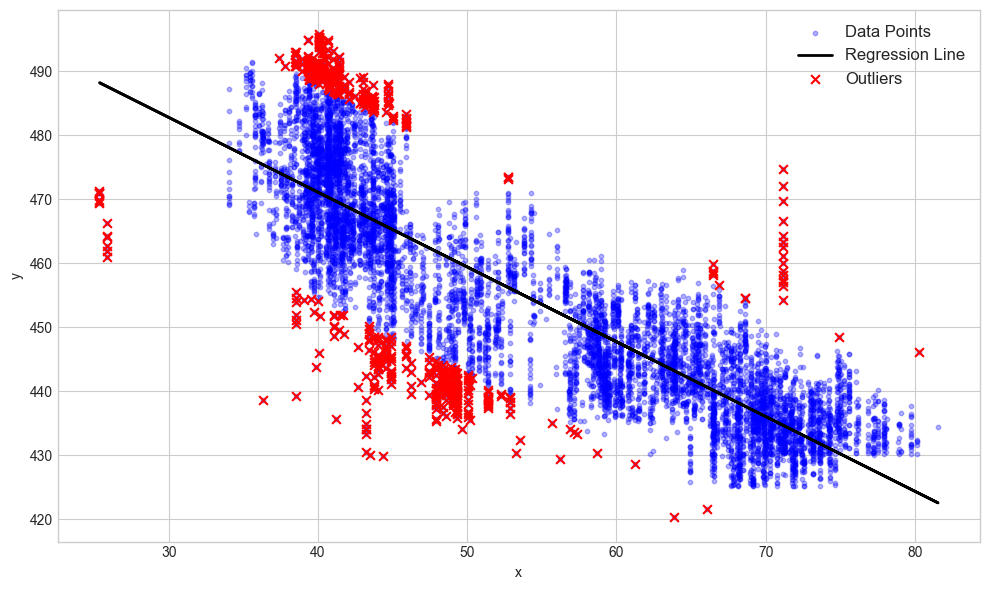


--------------------------------------------------------------
Description of the model with predictor Ambient Pressure (AP) 
--------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:01   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coe

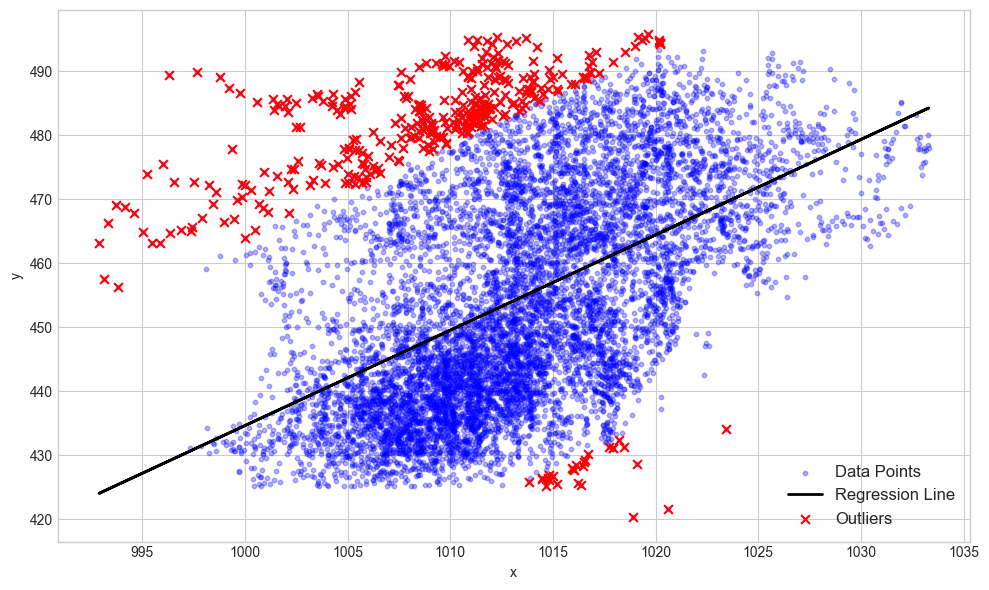


--------------------------------------------------------------
Description of the model with predictor Relative Humidity (RH) 
--------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:01   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

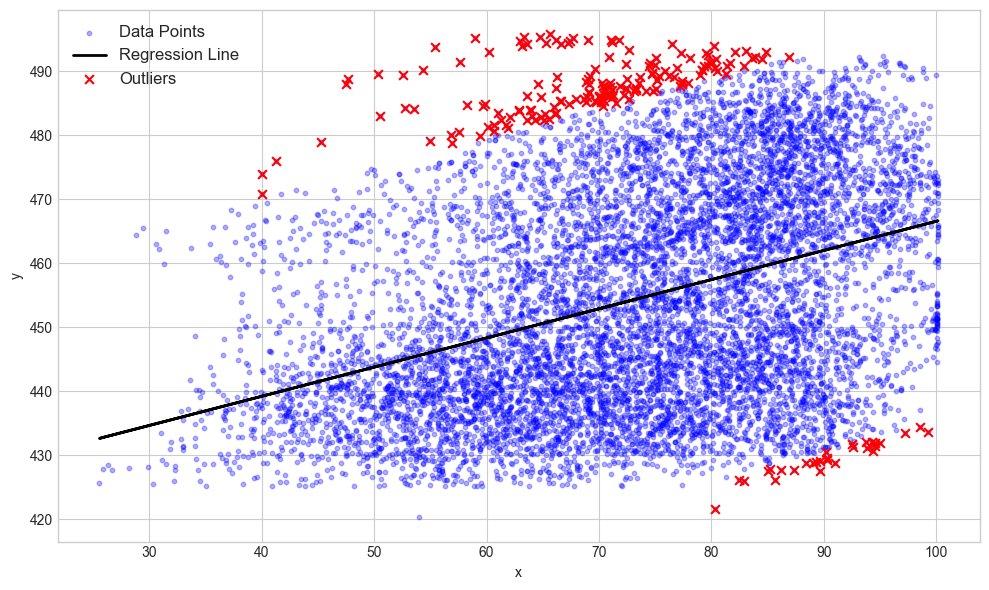

In [296]:
univariate_coefficient_set = []
y = np.array(data[data.columns[-1]])
predictors = data.columns[:-1]
pred_names = ['Ambient Temperature (AT)','Exhaust Vacuum (V)','Ambient Pressure (AP)','Relative Humidity (RH)',]
for i in range(len(predictors)):
    x = data[predictors[i]].to_numpy() 
    X = sm.add_constant(x)
    result = sm.OLS(y, X).fit()
    univariate_coefficient = result.params[1]
    univariate_coefficient_set.append(univariate_coefficient)
    print("\n--------------------------------------------------------------")
    print("Description of the model with predictor {0} ".format(pred_names[i]))
    print("--------------------------------------------------------------")
    print(result.summary())

    y_pred = result.predict(X)
    residuals = result.resid
    outlier_threshold = 2 * np.std(residuals)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x, y, color='b', alpha=0.3,marker='o',s=10, label='Data Points') 
    ax.plot(x, y_pred, color='k', linewidth=2, label='Regression Line')  
    ax.scatter(x[np.abs(residuals) > outlier_threshold], y[np.abs(residuals) > outlier_threshold], color='r', marker='x', s=40, label='Outliers')  # Outliers
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

#### The model with predictor Ambient Temperature (AT) and the model with predictor Exhaust Vacuum (V) have statistically signicant association with the response.<br><br> The outliers are marked in red against the data points

### (d) Multiple Regression

In [297]:
multivariate_coefficients = []
x = data.drop(columns=data.columns[-1],  axis=1).values
X = sm.add_constant(x)
y = data.drop(columns=data.columns[:-1],  axis=1).values.flatten()
result = sm.OLS(y, X).fit()
multivariate_coefficients=result.params 
multivariate_coefficients = multivariate_coefficients[1:]  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:02   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### We can reject the null hypothesis for all the predictors since the p value for all the four predictors are zero.

### (e) 1c Compare to 1d

In [298]:
uc = univariate_coefficient_set

In [299]:
mc = multivariate_coefficients.tolist()

In [300]:
uc,mc

([-2.171319958517799,
  -1.1681351265557134,
  1.4898716733991115,
  0.45565010226298047],
 [-1.9775131066353997,
  -0.23391642258249778,
  0.062082943780857325,
  -0.15805410291641356])

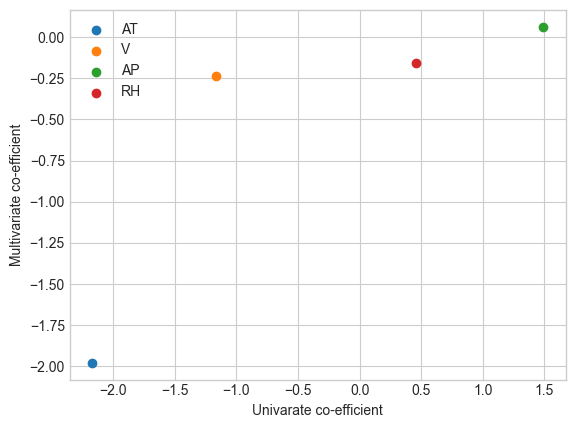

In [301]:
labels = ['AT','V','AP','RH']
colors = ['red', 'blue', 'green', 'orange']
scatters = []
for i in range(len(uc)):
    color = 'C{}'.format(i)  
    scatter = plt.scatter(uc[i], mc[i], c=color, label=labels[i])
    scatters.append(scatter)

legend_labels = [scatter.get_label() for scatter in scatters]
plt.legend(handles=scatters, labels=legend_labels)

plt.xlabel('Univarate co-efficient')
plt.ylabel('Multivariate co-efficient')

plt.show()

### (f) Nonlinear Association

In [302]:
predictor_columns = data.columns[:-1]  
response_column = data.columns[-1]  

for col in predictor_columns:
    X = data[col]
    X_poly = np.column_stack((X, X**2, X**3))
    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(data[response_column], X_poly)
    results = model.fit()

    print(f"Summary for predictor: {col}")
    print(results.summary())
    print('-' * 50) 


Summary for predictor: AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:02   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281     

#### AT<br><br>The p value of the polynomial terms (x2 and x3) for the predictor AT are both less  which means that they are statistically significant and there exists a non linear association between AT and response variable PE.

#### V <br><br>The p-value for the quadratic term (x2) is 0.768, indicating that it is likely not contributing significantly to the model. Therefore, null hypothesis cannot be rejected

#### AP<br><br>The p value of the polynomial terms (x2 and x3) for the predictor AP are both less which means that they are statistically significant and there exists a non linear association between AP and response variable PE.

#### RH<br><br>The p value of the polynomial terms (x2 and x3) for the predictor RH are both less which means that they are statistically significant and there exists a non linear association between RH and response variable PE.

### (g) Interactions of Predictors

In [303]:
predictors = ['AT', 'V', 'AP', 'RH']
interactions = list(itertools.combinations(predictors, 2))

data_interactions = data.copy()
for interaction in interactions:
    data_interactions[f'{interaction[0]}_{interaction[1]}'] = data[interaction[0]] * data[interaction[1]]

data_interactions['PE'] = data['PE']

X = data_interactions.drop('PE', axis=1)
y = data_interactions['PE']

X = sm.add_constant(X)  
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:02   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

Some interaction terms, such as AT_AP, have p-values gmore, indicating that they are not statistically significant.

The interaction terms V,AP,RH,AT_V, AT_RH, V_AP, and AP_RH have p-values less which means that there is association between these interaction terms and the response variable "PE" and are statistically significant. 

"AT", "V_RH" have p values less which indicates that they are statistically significant. 

 

### (h) Improvement

In [304]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

f_1 = "PE ~ AT + V + AP + RH"
model_1 = sm.OLS.from_formula(f_1, data=data.loc[X_train.index])
result_1 = model_1.fit()

y_train_pred_1 = result_1.predict(data.loc[X_train.index])
y_test_pred_1 = result_1.predict(data.loc[X_test.index])

train_mse_1 = mean_squared_error(y_train, y_train_pred_1)
test_mse_1 = mean_squared_error(y_test, y_test_pred_1)


f_2 = "PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH + np.power(AT, 2) + np.power(V, 2) + np.power(AP, 2) + np.power(RH, 2)"
model_2 = sm.OLS.from_formula(f_2, data=data.loc[X_train.index])
result_2 = model_2.fit()

y_train_pred_2 = result_2.predict(data.loc[X_train.index])
y_test_pred_2 = result_2.predict(data.loc[X_test.index])


train_mse_2 = mean_squared_error(y_train, y_train_pred_2)
test_mse_2 = mean_squared_error(y_test, y_test_pred_2)


print("Model 1 (without interaction terms and quadratic nonlinearities):")
print("Train MSE:", train_mse_1)
print("Test MSE:", test_mse_1)

print("\n",result_1.summary())
print("")
print("-----------------------------------------------------------------------")

print("Model 2 (with interaction terms and quadratic nonlinearities):")
print("Train MSE:", train_mse_2)
print("Test MSE:", test_mse_2)
print("\n",result_2.summary())


Model 1 (without interaction terms and quadratic nonlinearities):
Train MSE: 20.58083972573871
Test MSE: 21.239856938225284

                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        22:49:02   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

### (i) KNN

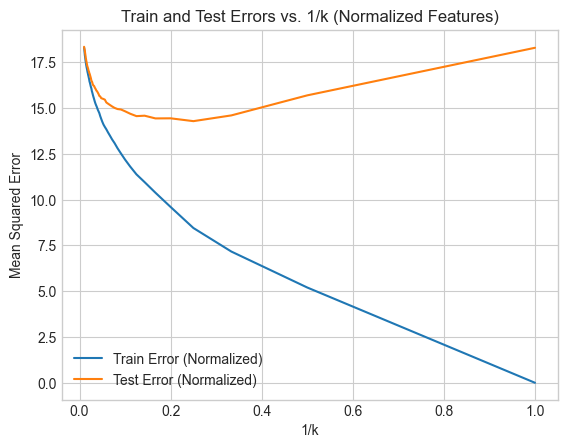

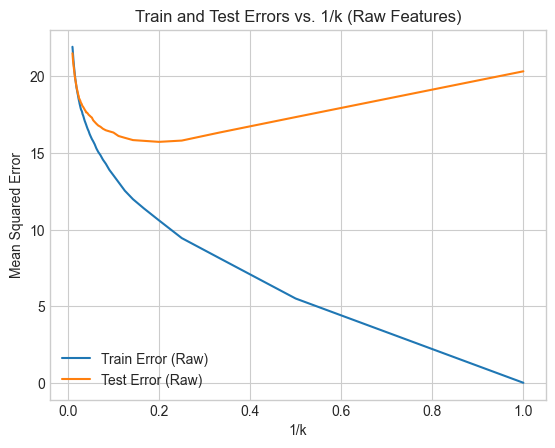

Best k value (Normalized Features): 4
Train Error (Normalized): 8.454347681797822
Test Error (Normalized): 14.291333431295715
_______________________________________________
Best k value (Raw Features): 5
Train Error (Raw): 10.600768887561596
Test Error (Raw): 15.726819842563568


In [307]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

min_test_error_norm = float('inf')
best_k_norm = 0
train_errors_norm = []
test_errors_norm = []

min_test_error_raw = float('inf')
best_k_raw = 0
train_errors_raw = []
test_errors_raw = []

for k in range(1,101):
    knn_norm = KNeighborsRegressor(n_neighbors=k)
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    
    knn_norm.fit(X_train_norm, y_train)
    y_train_pred_norm = knn_norm.predict(X_train_norm)
    y_test_pred_norm = knn_norm.predict(X_test_norm)    
    train_error_norm = mean_squared_error(y_train, y_train_pred_norm)
    test_error_norm = mean_squared_error(y_test, y_test_pred_norm)    
    
    
    knn_raw.fit(X_train, y_train)
    y_train_pred_raw = knn_raw.predict(X_train)
    y_test_pred_raw = knn_raw.predict(X_test)
    train_error_raw = mean_squared_error(y_train, y_train_pred_raw)
    test_error_raw = mean_squared_error(y_test, y_test_pred_raw)
    
    train_errors_norm.append(train_error_norm)
    test_errors_norm.append(test_error_norm)
    train_errors_raw.append(train_error_raw)
    test_errors_raw.append(test_error_raw)
    
    if test_error_norm < min_test_error_norm:
        min_test_error_norm = test_error_norm
        best_k_norm = k
    
    if test_error_raw < min_test_error_raw:
        min_test_error_raw = test_error_raw
        best_k_raw = k


plt.plot(1/np.array(k_values), train_errors_norm, label='Train Error (Normalized)')
plt.plot(1/np.array(k_values), test_errors_norm, label='Test Error (Normalized)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k (Normalized Features)')
plt.legend()
plt.show()

plt.plot(1/np.array(k_values), train_errors_raw, label='Train Error (Raw)')
plt.plot(1/np.array(k_values), test_errors_raw, label='Test Error (Raw)')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k (Raw Features)')
plt.legend()
plt.show()

print("Best k value (Normalized Features):", best_k_normalized)
print("Train Error (Normalized):", train_errors_norm[best_k_normalized - 1])
print("Test Error (Normalized):", test_errors_norm[best_k_normalized - 1])
print("_______________________________________________")
print("Best k value (Raw Features):", best_k_raw)
print("Train Error (Raw):", train_errors_raw[best_k_raw - 1])
print("Test Error (Raw):", test_errors_raw[best_k_raw - 1])


## (j ) Compare KNN and Linear

Test error comparison of Linear regression and KNN Regression<br><br>Linear Regression Model<br>Linear Regression with all terms: 18.6473124785894<br>Linear regression with interaction terms and quadratic nonlinearities:  18.6473124785894<br><br>KNN Regression<br>KNN Regression with raw features: 15.726819842563568<br>KNN Regression with normalised features: 14.291333431295715

##### KNN outperforms Linear regression. During our previous analysis, we have come to a conclusion that most of out predictors do not have a linear relationship with the response variable (PE). Linear regression  assumes linear relationship between the variables. So this might be a reason why the KNN Regression model performs better.

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

If the sample size is extremely large and the number of predictors are less, a flexible model would work better because using a inflexible method over a small number of predictors would cause overfitting which essentially means they follow the errors, or noise, too closely and a flexible method would be used to understand the underlying relations and patterns. 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

If the number of predictors are more and the number of observations are small, an inflexible method will perform better. The inflexible method forms relations between the different predictors since the number of observations are small. Using a flexible method might also increase the complexity of the model and decrease the interpretability. 

### (c) The relationship between the predictors and response is highly non-linear.

A flexible statistical model would work better in the above case since an inflexible method would usually assume linear relationship between the response and the predictors to fit the model. 

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

An inflexible method would work better than a flexible method because using a flexible method would result in overfitting the model, also decreasing the interpretability and also using a flexible method which is sensitive to noise and outliers can be increased when there is variance on error terms. 

## 3. ISLR: 2.4.7

| Obs|$X_1$|$X_2$|$X_3$|$Y$|
| -- | -- |-- |--|--|
| 1 | 0 | 3 | 0 | Red |
| 2 | 2 | 0 | 0 | Red |
| 3 | 0 | 1 | 3 | Red |
| 4 | 0 | 1 | 2 | Green |
| 5 | -1 | 0 | 1 | Green |
| 6 | 1 | 1 | 1 | Red |


### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

Euclidean distance is calculated using the formula = Square root [(x1-y1)^2 - (x2-y2)^2 - (x3-y3)] 

In [308]:
training_set = [(0,3,0),(2,0,0),(0,1,3),(0,1,2),(-1,0,1),(1,1,1)]
test_point = (0,0,0)
for point in training_set:
    dist = distance.euclidean(point, test_point)
    print(f"Euclidean Distance between {point} and test_point: {dist}")

Euclidean Distance between (0, 3, 0) and test_point: 3.0
Euclidean Distance between (2, 0, 0) and test_point: 2.0
Euclidean Distance between (0, 1, 3) and test_point: 3.1622776601683795
Euclidean Distance between (0, 1, 2) and test_point: 2.23606797749979
Euclidean Distance between (-1, 0, 1) and test_point: 1.4142135623730951
Euclidean Distance between (1, 1, 1) and test_point: 1.7320508075688772


### (b) What is our prediction with K = 1? Why?

Prediction with K = 1 would be Green since the 1st neighbor which has a closer Euclidean distance is observation 5 which has Y = Green

### (c) What is our prediction with K = 3? Why?

Prediction with K = 3 would be Red since the 1st three neighbors which has a closer Euclidean distance from the training point to the test point is observation 5, 6 and 2. The Y response for these observations are {Green, Red, Red}. 

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

The best value of K would be smaller since as the value of k increases the flexibility of the model would decrease.If a larger k is selected the Bayes decision boundary would become smoother and less sensitive to local variations. 

## References

https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/